## Preços de Carros Usados (Used Cars Dataset)

### Sobre o conjunto de dados

O Craigslist é a maior coleção de veículos usados ​​à venda do mundo, mas é muito difícil reunir todos eles em um só lugar. Eu criei um scraper para um projeto escolar e o aprimorei posteriormente para criar este conjunto de dados, que inclui todos os anúncios de veículos usados ​​nos Estados Unidos no Craigslist.


Esses dados são coletados a cada poucos meses e contêm praticamente todas as informações relevantes que o Craigslist fornece sobre vendas de carros, incluindo colunas como preço, condição, fabricante, latitude/longitude e outras 18 categorias. Para projetos de aprendizado de máquina, considere a engenharia de recursos em colunas de localização, como latitude e longitude. Para anúncios anteriores, consulte versões mais antigas do conjunto de dados.

In [1]:
import polars as pl
import seaborn as sea 
import matplotlib.pyplot as plt

In [2]:
data = pl.read_csv(
    source="C:\\Users\\mateu\\Downloads\\archive (3)\\vehicles.csv"
)

In [3]:
data.head(3)

id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
i64,str,str,str,i64,i64,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
7222695916,"""https://prescott.craigslist.or…","""prescott""","""https://prescott.craigslist.or…",6000,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""az""",null,null,null
7218891961,"""https://fayar.craigslist.org/c…","""fayetteville""","""https://fayar.craigslist.org""",11900,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""ar""",null,null,null
7221797935,"""https://keys.craigslist.org/ct…","""florida keys""","""https://keys.craigslist.org""",21000,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""fl""",null,null,null


### Analise dos dados

Verificando o tipo de atributos da cada coluna

In [4]:
tamanho_maximo = max([len(col) for col in data.columns]) + 2

for i, j in zip(data.columns, data.dtypes):
    print(f'{i:.<{tamanho_maximo}}: {j}')

id............: Int64
url...........: String
region........: String
region_url....: String
price.........: Int64
year..........: Int64
manufacturer..: String
model.........: String
condition.....: String
cylinders.....: String
fuel..........: String
odometer......: Int64
title_status..: String
transmission..: String
VIN...........: String
drive.........: String
size..........: String
type..........: String
paint_color...: String
image_url.....: String
description...: String
county........: String
state.........: String
lat...........: Float64
long..........: Float64
posting_date..: String


Verificando a quantidade de valores nulos de cada coluna

In [5]:
subset = data.null_count().unpivot(variable_name='colunas', value_name='valor_de_nulos')

subset = subset.with_columns(
   porcentagem = (pl.col('valor_de_nulos') / data.shape[0]) * 100
)

In [14]:
subset = subset.sort(by='porcentagem', descending=True)

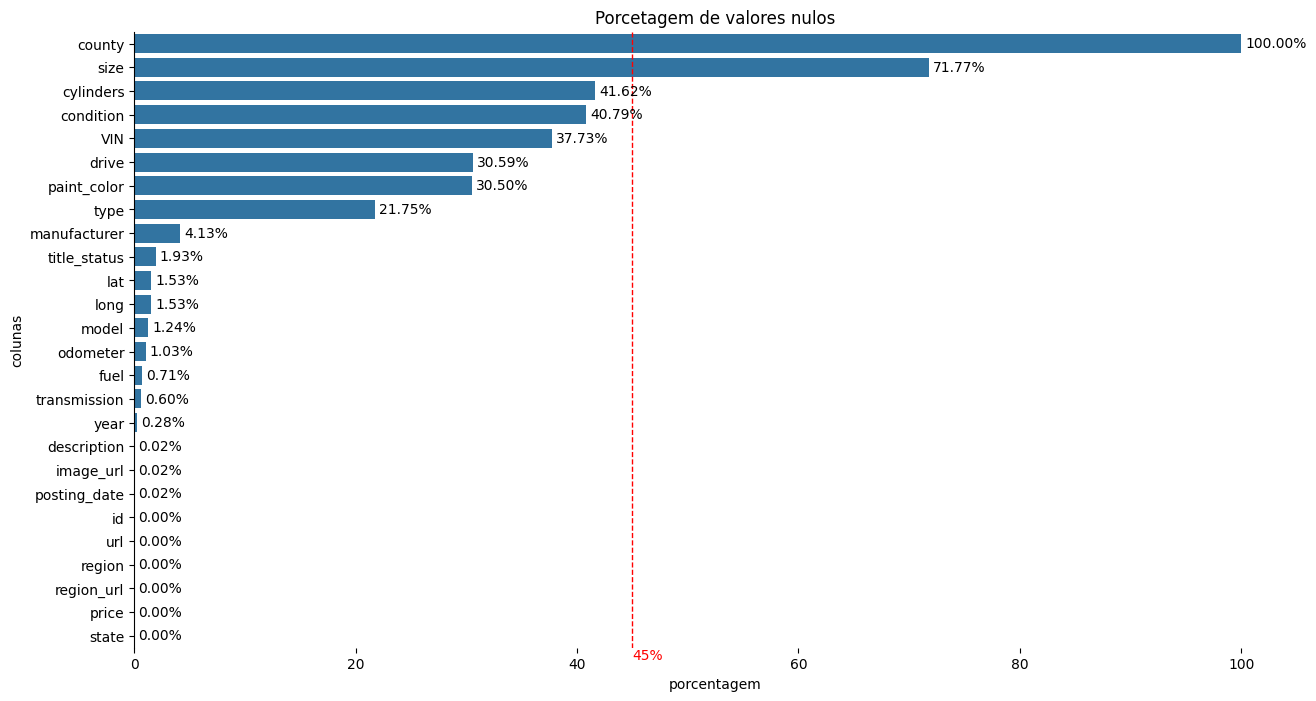

In [43]:
plt.figure(figsize=(15, 8))
bar = sea.barplot(
    x=subset['porcentagem'], y=subset['colunas']
)
bar.bar_label(bar.containers[0], fmt='%.2f%%', padding=3)
bar.axvline(x=45, color='red', linestyle='--', linewidth=1)
bar.text(x=45, y=26, s='45%', color='red')
plt.gca().set_title(label='Porcetagem de valores nulos')
plt.gca().spines[['top', 'right', 'bottom']].set_visible(False)
plt.show()